# Get and Format data 

In [49]:
from tqdm import tqdm
import gzip
import os
import shutil
import urllib.request
import requests
import json
import io
import pandas as pd
import numpy as np
import rampwf as rw
from rampwf.workflows.sklearn_pipeline import SKLearnPipeline, Estimator
from rampwf.prediction_types import make_regression
from sklearn.model_selection import KFold

from problem import *

In [20]:
X_train, y_train = get_train_data()
X_test, y_test = get_test_data()

/Users/pierreloviton/PycharmProjects/data-science/M2DS X/Datacamp/project_ramp_challenge/problem.py:46: DtypeWarning: Columns (35) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(io.StringIO(response.text))


In [13]:
X_train.head()

,id,numero_dpe,usr_diagnostiqueur_id,usr_logiciel_id,tr001_modele_dpe_id,nom_methode_dpe,version_methode_dpe,nom_methode_etude_thermique,version_methode_etude_thermique,date_visite_diagnostiqueur,...,tv017_zone_hiver_t_ext_moyen,tv017_zone_hiver_peta_cw,tv017_zone_hiver_dh14,tv017_zone_hiver_prs1,tv018_zone_ete_code,tv018_zone_ete_sclim_inf_150,tv018_zone_ete_sclim_sup_150,tv018_zone_ete_rclim_autres_etages,tv018_zone_ete_rclim_dernier_etage,geometry
0,179,1330V8000001A,3710,3,8,Méthode Facture,NaN,\N,\N,2013-04-10,...,9.65,14.5,22200,2.9,Ed,5,7,4.0,5,POINT EMPTY
1,355,1356V4000001E,444,3,4,Facture,facture,\N,\N,2013-04-12,...,8.08,12.0,33300,3.4,Ea,2,4,1.5,2,POINT EMPTY
2,410,1317V7000001E,7374,2,7,3CL - DPE,V2012,\N,\N,2013-04-11,...,8.08,12.0,33300,3.4,Ec,4,6,3.0,4,POINT (-1.14895 46.16216)
3,429,1369V4000001I,6931,7,4,3CL,Version 1.3,\N,\N,2013-04-02,...,6.58,10.5,42030,3.6,Ec,4,6,3.0,4,POINT EMPTY
4,470,1364V8000001H,231,3,8,Méthode Facture,NaN,\N,\N,2013-04-15,...,8.08,12.0,33300,3.4,Ec,4,6,3.0,4,POINT EMPTY


In [13]:
X_test.head()

,id,numero_dpe,usr_diagnostiqueur_id,usr_logiciel_id,tr001_modele_dpe_id,nom_methode_dpe,version_methode_dpe,nom_methode_etude_thermique,version_methode_etude_thermique,date_visite_diagnostiqueur,...,tv017_zone_hiver_t_ext_moyen,tv017_zone_hiver_peta_cw,tv017_zone_hiver_dh14,tv017_zone_hiver_prs1,tv018_zone_ete_code,tv018_zone_ete_sclim_inf_150,tv018_zone_ete_sclim_sup_150,tv018_zone_ete_rclim_autres_etages,tv018_zone_ete_rclim_dernier_etage,geometry
0,179,1330V8000001A,3710,3,8,Méthode Facture,NaN,\N,\N,2013-04-10,...,9.65,14.5,22200,2.9,Ed,5,7,4.0,5,POINT EMPTY
1,355,1356V4000001E,444,3,4,Facture,facture,\N,\N,2013-04-12,...,8.08,12.0,33300,3.4,Ea,2,4,1.5,2,POINT EMPTY
2,410,1317V7000001E,7374,2,7,3CL - DPE,V2012,\N,\N,2013-04-11,...,8.08,12.0,33300,3.4,Ec,4,6,3.0,4,POINT (-1.14895 46.16216)
3,429,1369V4000001I,6931,7,4,3CL,Version 1.3,\N,\N,2013-04-02,...,6.58,10.5,42030,3.6,Ec,4,6,3.0,4,POINT EMPTY
4,470,1364V8000001H,231,3,8,Méthode Facture,NaN,\N,\N,2013-04-15,...,8.08,12.0,33300,3.4,Ec,4,6,3.0,4,POINT EMPTY


In [12]:
X_train.shape

(515562, 132)

In [ ]:
y_train.shape

In [ ]:
X_test.shape

In [ ]:
y_test.shape

In [ ]:
df_train = pd.concat([X_train, y_train], axis=1)
df_test = pd.concat([X_test, y_test], axis=1)

df = pd.concat([df_train, df_test], axis=0)

In [15]:
df.describe()

,id,usr_diagnostiqueur_id,usr_logiciel_id,tr001_modele_dpe_id,consommation_energie,estimation_ges,tr002_type_batiment_id,annee_construction,tv016_departement_id,etat_avancement,...,tv016_departement_fecs_ancienne_i_c,tv016_departement_fecs_recente_i_c,tv017_zone_hiver_t_ext_moyen,tv017_zone_hiver_peta_cw,tv017_zone_hiver_dh14,tv017_zone_hiver_prs1,tv018_zone_ete_sclim_inf_150,tv018_zone_ete_sclim_sup_150,tv018_zone_ete_rclim_autres_etages,tv018_zone_ete_rclim_dernier_etage
count,5.155620e+05,515562.000000,515562.000000,515562.000000,5.155620e+05,5.155620e+05,515562.000000,515562.000000,515562.000000,515562.0,...,515562.000000,515562.000000,515562.000000,515562.000000,515562.000000,515562.000000,515562.000000,515562.000000,515562.000000,515562.000000
mean,5.609478e+06,10550.424335,5.013535,8.059642,6.316332e+02,3.839258e+01,4.028732,1625.421656,53.552737,1.0,...,30.260960,43.640895,7.367385,11.388792,37233.418018,3.463321,3.382443,5.382443,2.471974,3.382443
std,3.387349e+06,5790.612814,3.597077,5.001112,1.974300e+05,9.621950e+03,0.167052,746.579495,26.416229,0.0,...,5.077864,8.883947,1.042433,1.278140,6547.382507,0.216377,0.932234,0.932234,0.811336,0.932234
min,1.790000e+02,3.000000,2.000000,1.000000,-1.085000e+05,-2.924000e+01,4.000000,-1.000000,1.000000,1.0,...,24.000000,0.000000,6.580000,10.500000,22200.000000,2.900000,2.000000,4.000000,1.500000,2.000000
25%,2.682081e+06,6137.000000,3.000000,4.000000,0.000000e+00,0.000000e+00,4.000000,1947.000000,33.000000,1.0,...,26.000000,38.000000,6.580000,10.500000,33300.000000,3.400000,3.000000,5.000000,2.000000,3.000000
50%,5.397978e+06,10430.000000,3.000000,8.000000,6.301000e+01,2.460000e+00,4.000000,1947.000000,59.000000,1.0,...,29.000000,42.000000,6.580000,10.500000,42030.000000,3.600000,3.000000,5.000000,2.000000,3.000000
75%,8.565780e+06,14809.000000,5.000000,8.000000,2.630000e+02,1.500000e+01,4.000000,1974.000000,75.000000,1.0,...,33.000000,49.000000,8.080000,12.000000,42030.000000,3.600000,4.000000,6.000000,3.000000,4.000000
max,1.170914e+07,25879.000000,16.000000,24.000000,1.000000e+08,4.766768e+06,5.000000,32767.000000,97.000000,1.0,...,43.000000,62.000000,9.650000,14.500000,42030.000000,3.600000,5.000000,7.000000,4.000000,5.000000


<AxesSubplot:>

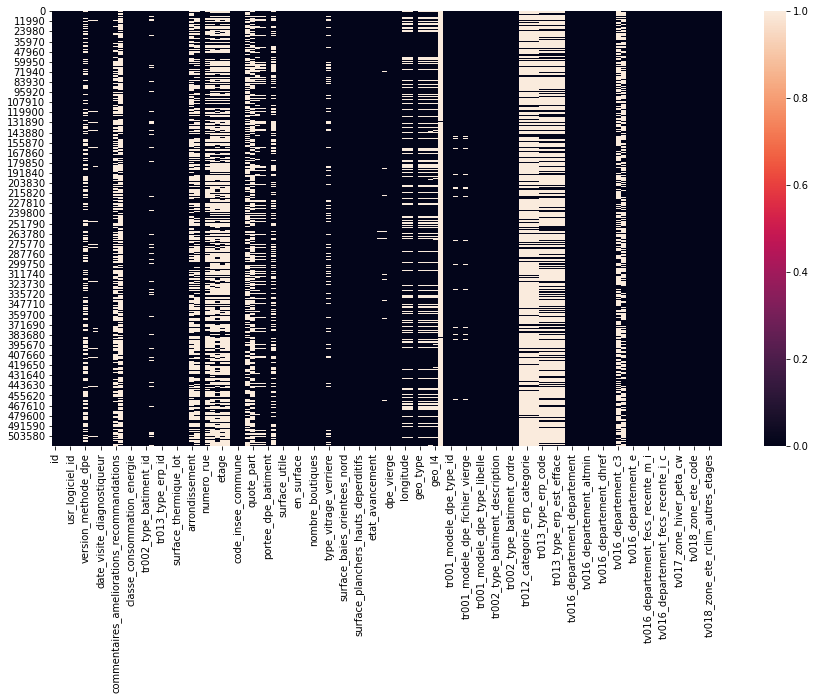

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,8))
sns.heatmap(df.isna())

# Plot interactive map

In [8]:
import geopandas as gpd

dpe = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitude, df.latitude), crs = 4326)
dpe = dpe.dropna(subset = ['longitude', 'latitude'])

In [10]:
import seaborn as sns
import folium

palette = sns.color_palette("coolwarm", 8)

def interactive_map_dpe(dpe):

    # convert in number
    dpe['color'] = [ord(dpe.iloc[i]['classe_consommation_energie'].lower()) - 96 for i in range(len(dpe))]
    dpe = dpe.loc[dpe['color']<=7]
    dpe['color'] = [palette.as_hex()[x] for x in dpe['color']]


    center = dpe[['latitude', 'longitude']].mean().values.tolist()
    sw = dpe[['latitude', 'longitude']].min().values.tolist()
    ne = dpe[['latitude', 'longitude']].max().values.tolist()

    m = folium.Map(location = center, tiles='Stamen Toner')

    # I can add marker one by one on the map
    for i in range(0,len(dpe)):
        folium.Marker([dpe.iloc[i]['latitude'], dpe.iloc[i]['longitude']],
                    popup=f"Année de construction: {dpe.iloc[i]['annee_construction']}, <br>DPE: {dpe.iloc[i]['classe_consommation_energie']}",
                    icon=folium.Icon(color="black", icon="home", icon_color = dpe.iloc[i]['color'])).add_to(m)

    m.fit_bounds([sw, ne])

    return m

m = interactive_map_dpe(dpe.head(10))


/Users/pierreloviton/opt/anaconda3/lib/python3.9/site-packages/geopandas/geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [11]:
m